In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [70]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [71]:
img_width = 180
img_height = 180

In [72]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [73]:
data_cat = data_train.class_names

In [74]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [75]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


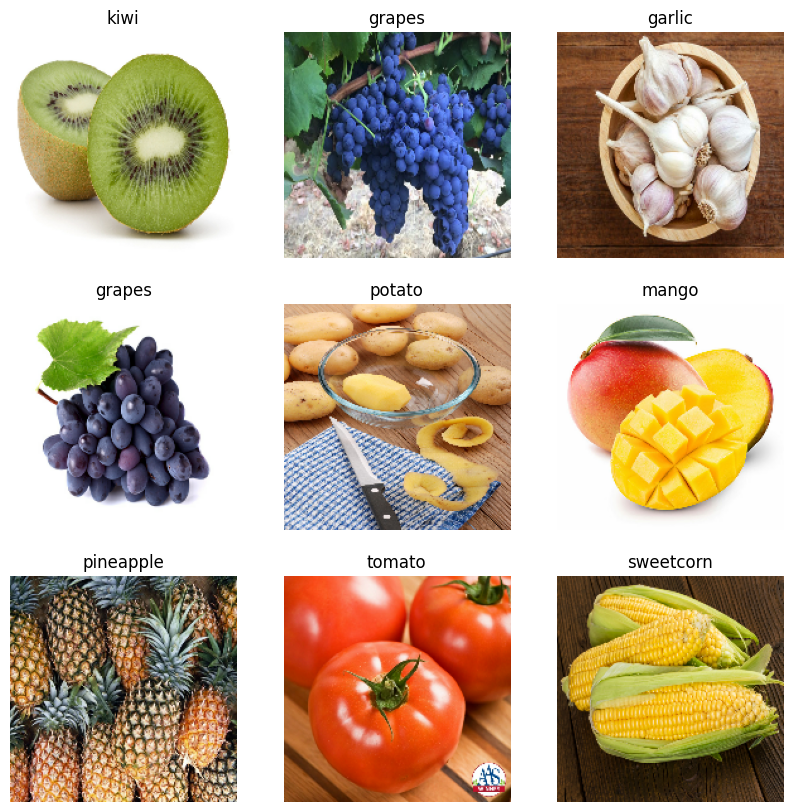

In [76]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [77]:
from tensorflow.keras.models import Sequential

In [78]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [79]:
model = Sequential([
    layers.Rescaling(1./225),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [80]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [81]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 307ms/step - accuracy: 0.0701 - loss: 4.0620 - val_accuracy: 0.3362 - val_loss: 2.2504
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.3002 - loss: 2.4039 - val_accuracy: 0.6268 - val_loss: 1.3839
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - accuracy: 0.4500 - loss: 1.8642 - val_accuracy: 0.7607 - val_loss: 0.8970
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.6322 - loss: 1.2964 - val_accuracy: 0.8775 - val_loss: 0.5819
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.7784 - loss: 0.7678 - val_accuracy: 0.9231 - val_loss: 0.4031
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - accuracy: 0.8628 - loss: 0.4746 - val_accuracy: 0.9373 - val_loss: 0.4283
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.9105 - loss: 0.3218 - val_accuracy: 0.9487 - val_loss: 0.3901
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.9194 - loss: 0.3190 - val_accu

Text(0.5, 1.0, 'Loss')

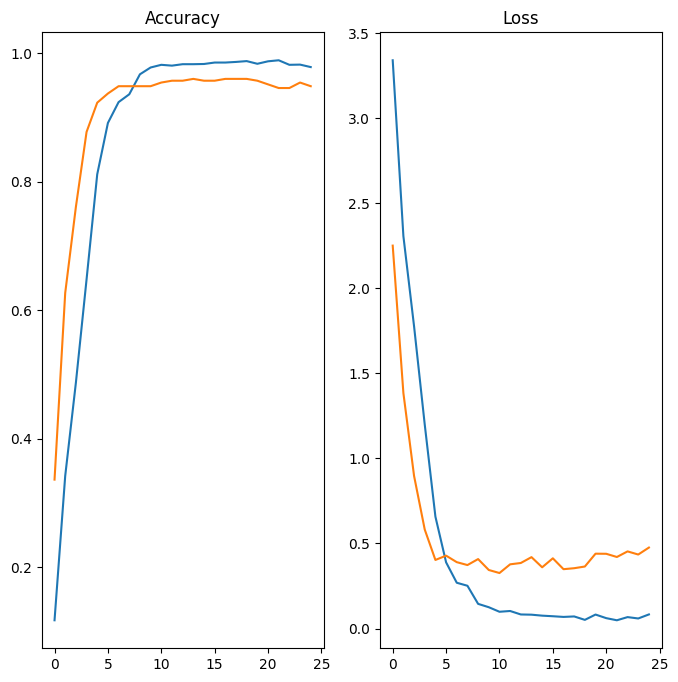

In [82]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [165]:
image = 'samples/mango.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [166]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [167]:
score = tf.nn.softmax(predict)

In [168]:
print(f'Veg/Fruit in image is {data_cat[np.argmax(score)]} \naccuracy of {np.max(score) * 100:0.2f}')

Veg/Fruit in image is mango 
accuracy of 99.98
